In [1]:
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns

from math import log

### Load data

In [2]:
x_tr = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
x_te = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)

y_tr = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
y_te = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)


In [3]:
max_iter = list(range(41))
max_iter.pop(0)

tr_loss_list = list()
tr_accuracy_list = list()
first_weight_list = list()

In [4]:
for i in max_iter:
    clf = sklearn.linear_model.LogisticRegression(solver='liblinear',max_iter=i).fit(x_tr, y_tr)
    predict = clf.predict_proba(x_tr)

    acc = clf.score(x_tr, y_tr)
    log_loss = sklearn.metrics.log_loss(y_tr, predict)

    tr_accuracy_list.append(acc)
    tr_loss_list.append(log_loss)
    first_weight_list.append(clf.coef_[0][0])

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\s

### Plot log-loss and accuracy

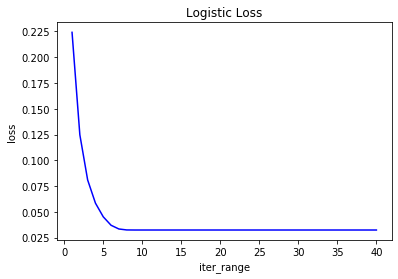

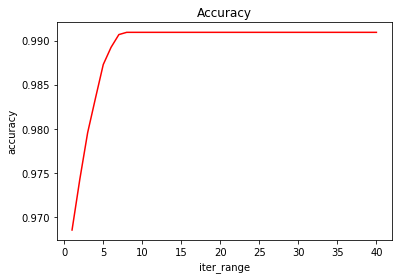

In [5]:
### Plot the Log-loss - iteration
plt.figure()
plt.xlabel('iter_range')
plt.ylabel('loss')
plt.title("Logistic Loss")
plt.plot(max_iter, tr_loss_list, color='blue')
plt.savefig('./1.1_logloss.jpg')
plt.show()

### Plot the Accuracy - iteration
plt.figure()
plt.xlabel('iter_range')
plt.ylabel('accuracy')
plt.title("Accuracy")
plt.plot(max_iter, tr_accuracy_list, color='red')
plt.savefig('./1.1_accuracy.jpg')
plt.show()

### Plot first weight

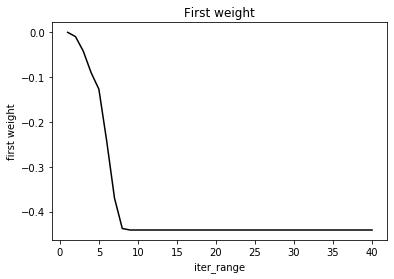

In [6]:
### Plot the first weight - iteration
plt.figure()
plt.xlabel('iter_range')
plt.ylabel('first weight')
plt.title("First weight")
plt.plot(max_iter, first_weight_list, color='black')
plt.savefig('./1.2_firstweight.jpg')
plt.show()

### Explore C

In [7]:
C_grid = np.logspace(-9, 6, 31)
C_log = list()
tr_accuracy_list_C = list()
te_loss_list_C=list()

In [8]:
for c in C_grid:
    ### train the model on train data
    clf = sklearn.linear_model.LogisticRegression(solver='liblinear',C=c).fit(x_tr, y_tr)
    
    ### get the score on train data
    acc = clf.score(x_tr, y_tr)
    
    ### Record the log loss on test data
    predict = clf.predict_proba(x_te)
    log_loss = sklearn.metrics.log_loss(y_te, predict)
    
    te_loss_list_C.append(log_loss)
    tr_accuracy_list_C.append(acc)

In [9]:
least_loss = min(te_loss_list_C)
best_c_index = te_loss_list_C.index(least_loss)
best_c = C_grid[best_c_index]
print("Best  C ", best_c)

clf_best = sklearn.linear_model.LogisticRegression(solver='liblinear',C=best_c).fit(x_tr, y_tr)
predict_best = clf_best.predict_proba(x_te)
best_acc = clf.score(x_te, y_te)
print("Best Acc  ", best_acc)

Best  C  0.03162277660168379
Best Acc   0.9475542107917297


### compute confusion matrix

In [10]:
print(predict_best[0:10])

[[1.42944890e-02 9.85705511e-01]
 [3.90543003e-03 9.96094570e-01]
 [6.03985828e-03 9.93960142e-01]
 [1.79380764e-02 9.82061924e-01]
 [8.23850075e-04 9.99176150e-01]
 [9.44370708e-05 9.99905563e-01]
 [9.76197394e-01 2.38026063e-02]
 [4.85976281e-02 9.51402372e-01]
 [2.46118094e-01 7.53881906e-01]
 [9.40099056e-02 9.05990094e-01]]


### count index for FP and FN

In [11]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    fn_idx = []
    fp_idx = []
    
    for i in range(0, len(ytrue_N)):
        if ytrue_N[i] == 1:
            if ytrue_N[i] != yhat_N[i]:
                FN = FN + 1.0
                fn_idx.append(i)
            else:
                TP = TP + 1.0
        else:
            if ytrue_N[i] != yhat_N[i]:
                FP = FP + 1.0
                fp_idx.append(i)
            else:
                TN = TN + 1.0
    
    
    return fn_idx, fp_idx, TP, TN, FP, FN

In [12]:
true = []
result = []
for index in list(range(y_te.size)):
    true.append(y_te[index])
    if predict_best[index][1]>=0.5:
        result.append(1)
    else:
        result.append(0)
        
fn_idx, fp_idx, TP,TN,FP, FN = calc_TP_TN_FP_FN(true, result)

In [13]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [14]:
predict_onenumber = []
for pre in predict_best:
    predict_onenumber.append(pre[1])
predict_onenumber = np.array(predict_onenumber)
cm = calc_confusion_matrix_for_threshold(y_te, predict_onenumber, 0.5)

print(cm)

Predicted    0    1
True               
0          942   32
1           33  976


In [15]:
print("Final Acc = ", ((TP + TN) / (TP + FP + TN + FN)))

Final Acc =  0.9672213817448311


In [16]:
fp_images = []
fn_images = []
for i in list(range(9)):
    vector = x_te[fp_idx[i]]
    image = []
    for row in list(range(28)):
        image.append(vector[28*row+0:28*row+28])
    fp_images.append(image)
    
for i in list(range(9)):
    vector = x_te[fn_idx[i]]
    image = []
    for row in list(range(28)):
        image.append(vector[28*row+0:28*row+28])
    fn_images.append(image)

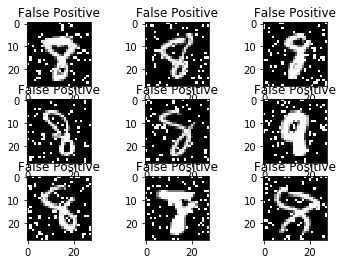

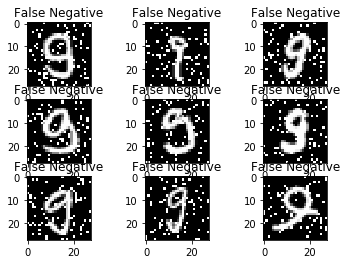

In [17]:
plt.figure()

for row in list(range(3)):
    for colomn in list(range(3)):
        plt.subplot(3,3,row*3 + colomn + 1)
        plt.title("False Positive")
        plt.imshow(fp_images[row*3 + colomn], cmap=plt.cm.gray, vmin=0.0, vmax=1.0)
plt.savefig('./1.4_fp.jpg')

plt.figure()

for row in list(range(3)):
    for colomn in list(range(3)):
        plt.subplot(3,3,row*3 + colomn + 1)
        plt.title('False Negative')
        plt.imshow(fn_images[row*3 + colomn], cmap=plt.cm.gray, vmin=0.0, vmax=1.0)
plt.savefig('./1.4_fn.jpg')

### Plot Coef

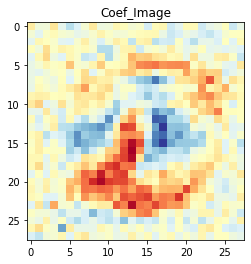

In [18]:
coef_vector = clf_best.coef_[0]
coef_image = []
for row in list(range(28)):
    coef_image.append(coef_vector[28*row+0 : 28*row+28])
    
plt.figure()
plt.title("Coef_Image")
plt.imshow(coef_image, cmap=plt.cm.RdYlBu, vmin=-0.5, vmax=0.5)

plt.savefig('./1.4_coef.jpg')

In [24]:

print(coef_image[17][27])

print("Blue")
print(coef_image[17][15])
print(coef_image[17][14])
print(coef_image[17][13])

print()

0.0010408080159932263
Blue
0.2908849115915229
-0.07926752270052721
-0.4708522397436262



(0.26905036524413684, 0.45397923875432522, 0.70349865436370629, 1.0)


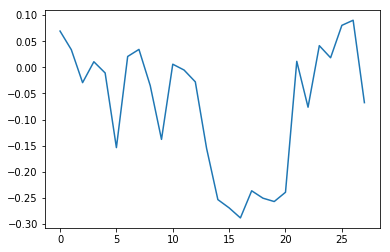

In [34]:
x=17
y=5
plt.figure()
plt.plot(list(range(28)), coef_image[:][y])

cm = plt.cm.get_cmap('RdYlBu')
print(cm(0.9))

(0.26905036524413684, 0.45397923875432522, 0.70349865436370629, 1.0)


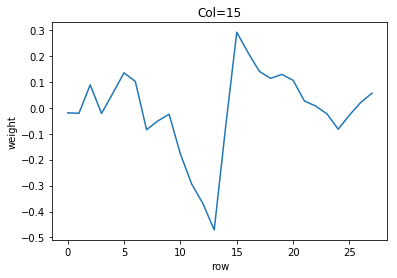

In [31]:
x=17
y=17
plt.figure()
plt.plot(list(range(28)), coef_image[x][:])
plt.title("Col=15")
plt.xlabel('row')
plt.ylabel('weight')
cm = plt.cm.get_cmap('RdYlBu')
print(cm(0.9))